In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [14]:
path = "dataset/covtypeNorm.csv"
data = pd.read_csv(path, header=None).iloc[:10000, :]
y_data = data.iloc[:,54]



In [15]:
cl1 = data.loc[data[54] == 1]
cl2 = data.loc[data[54] == 2]
cl3 = data.loc[data[54] == 3]
cl4 = data.loc[data[54] == 4]
cl5 = data.loc[data[54] == 5]
cl6 = data.loc[data[54] == 6]
cl7 = data.loc[data[54] == 7]

cl1.drop(cl1.columns[54], axis=1, inplace=True)
cl2.drop(cl2.columns[54], axis=1, inplace=True)
cl3.drop(cl3.columns[54], axis=1, inplace=True)
cl4.drop(cl4.columns[54], axis=1, inplace=True)
cl5.drop(cl5.columns[54], axis=1, inplace=True)
cl6.drop(cl6.columns[54], axis=1, inplace=True)
cl7.drop(cl7.columns[54], axis=1, inplace=True)
cls = [cl1, cl2, cl3, cl4, cl5, cl6, cl7]

/home/joker/virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/joker/virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/joker/virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [16]:
data.drop(data.columns[54], axis=1, inplace=True)

In [17]:
y_data

0       5
1       5
2       2
3       2
4       5
5       2
6       5
7       5
8       5
9       5
10      5
11      2
12      2
13      5
14      5
15      5
16      5
17      5
18      5
19      5
20      5
21      2
22      5
23      5
24      5
25      5
26      5
27      2
28      2
29      5
       ..
9970    7
9971    7
9972    1
9973    1
9974    7
9975    7
9976    7
9977    5
9978    2
9979    1
9980    1
9981    1
9982    7
9983    7
9984    7
9985    7
9986    1
9987    1
9988    1
9989    2
9990    5
9991    7
9992    1
9993    1
9994    1
9995    5
9996    5
9997    1
9998    1
9999    1
Name: 54, Length: 10000, dtype: int64

In [18]:
partial = data.iloc[1:50000 :]

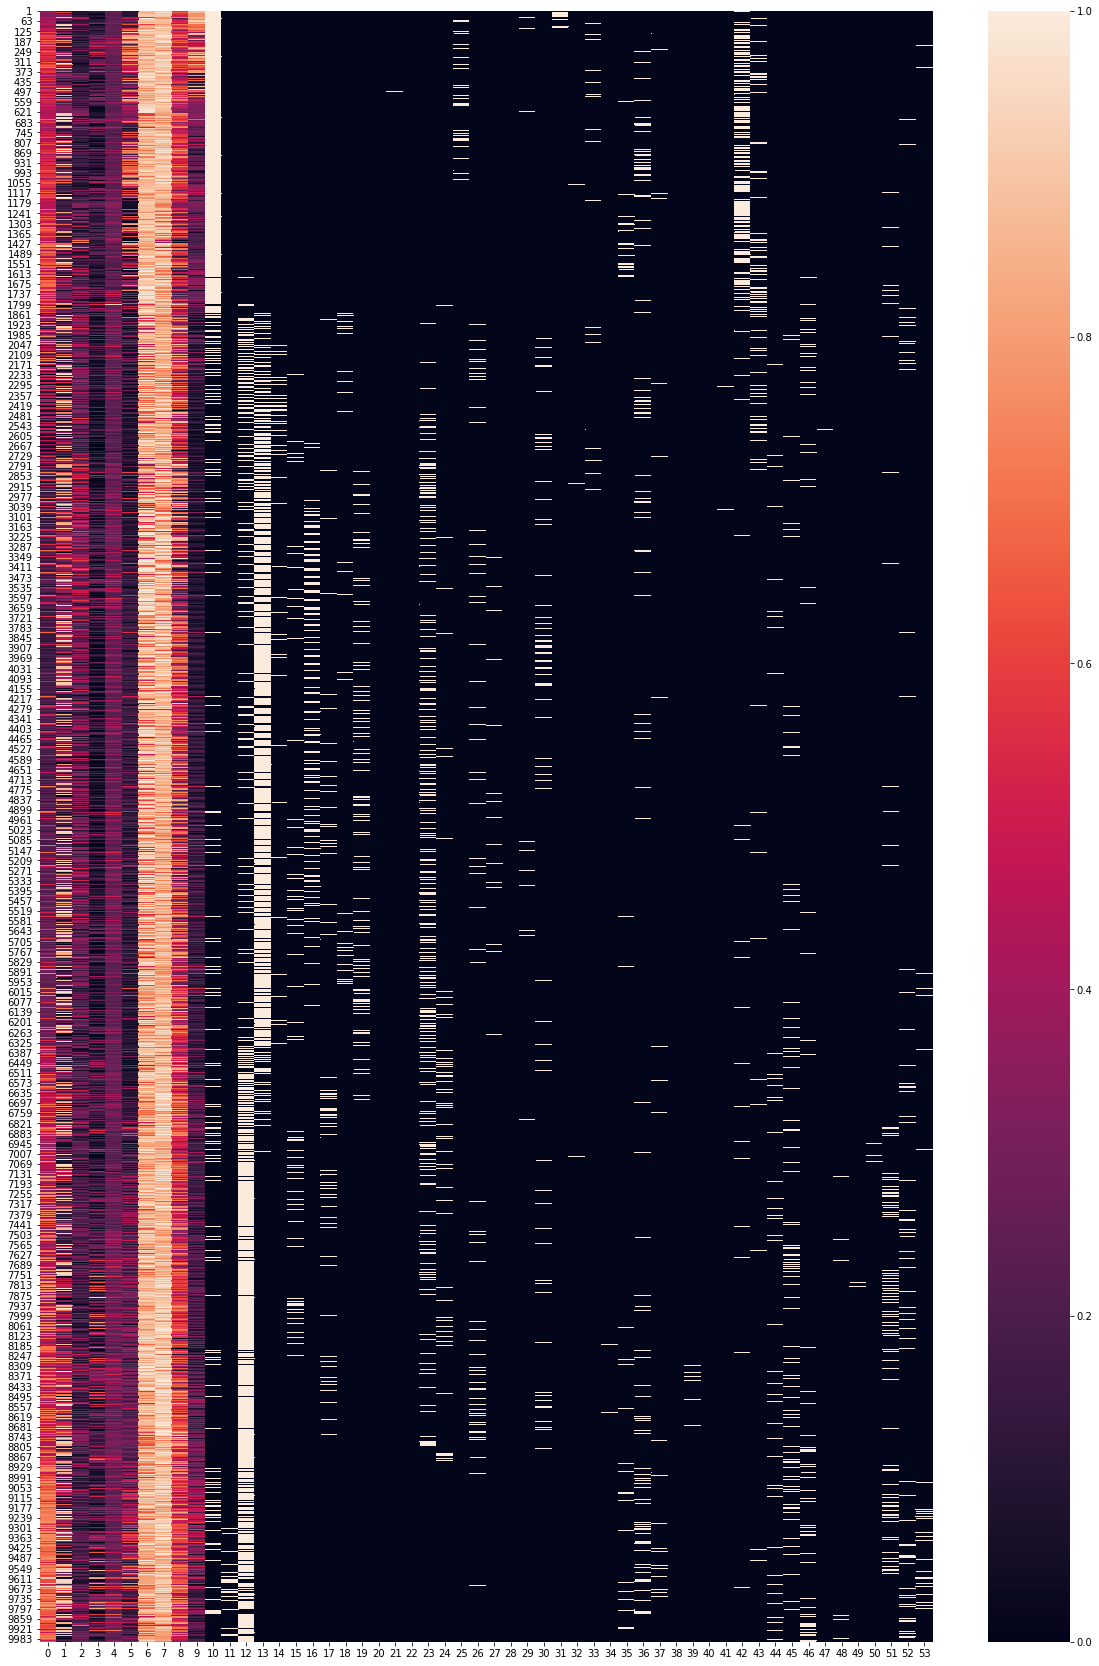

In [19]:
fig, ax = plt.subplots(figsize=(20,30))  
sns.heatmap(partial, ax=ax)

In [20]:
for i in range(10, 53):
    print(data.groupby(i).size())

10
0    7325
1    2675
dtype: int64
11
0    9940
1      60
dtype: int64
12
0    6243
1    3757
dtype: int64
13
0    6492
1    3508
dtype: int64
14
0    9733
1     267
dtype: int64
15
0    9625
1     375
dtype: int64
16
0    9329
1     671
dtype: int64
17
0    9604
1     396
dtype: int64
18
0    9878
1     122
dtype: int64
19
0    9497
1     503
dtype: int64
20
0    10000
dtype: int64
21
0    9999
1       1
dtype: int64
22
0    9994
1       6
dtype: int64
23
0    8618
1    1382
dtype: int64
24
0    9763
1     237
dtype: int64
25
0    9824
1     176
dtype: int64
26
0    9661
1     339
dtype: int64
27
0    9881
1     119
dtype: int64
28
0    10000
dtype: int64
29
0    9936
1      64
dtype: int64
30
0    9569
1     431
dtype: int64
31
0    9954
1      46
dtype: int64
32
0    9966
1      34
dtype: int64
33
0    9900
1     100
dtype: int64
34
0    9987
1      13
dtype: int64
35
0    9807
1     193
dtype: int64
36
0    9470
1     530
dtype: int64
37
0    9854
1     146
dtype: int64
38
0    10

## Try kmeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
n_data = pca.fit_transform(data)
len(n_data)

10000

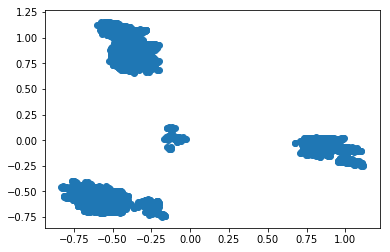

In [23]:
x_ax, y_ax = zip(*n_data)
plt.scatter(x_ax, y_ax)
plt.show()

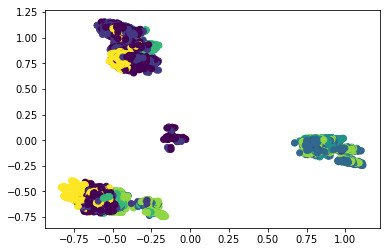

In [24]:
y_pred = KMeans(n_clusters=5, random_state=42, n_jobs=-1).fit_predict(n_data)
x_ax, y_ax = zip(*n_data)
plt.scatter(x_ax, y_ax, c=y_data)
plt.show()

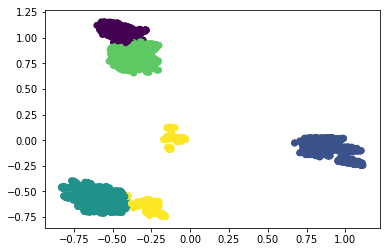

In [25]:
y_pred = KMeans(n_clusters=5, random_state=42, n_jobs=6).fit_predict(n_data)
x_ax, y_ax = zip(*n_data)
plt.scatter(x_ax, y_ax, c=y_pred)
plt.show()


## For one class

In [39]:
pca_cls = []
for cl in cls:
    pca = PCA(n_components=2)
    n_cl = pca.fit_transform(cl)
    pca_cls.append(n_cl)

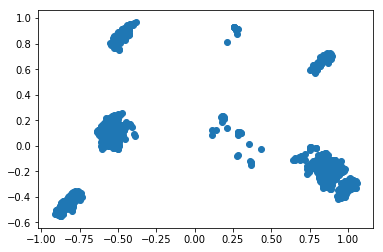

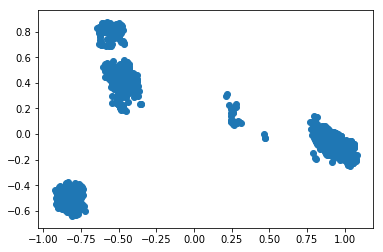

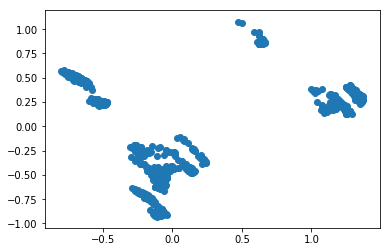

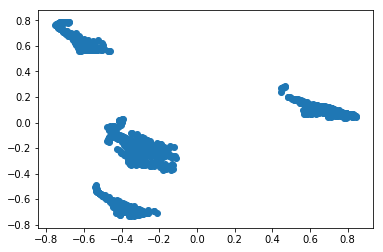

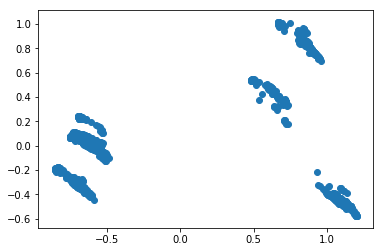

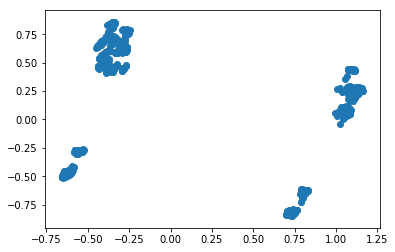

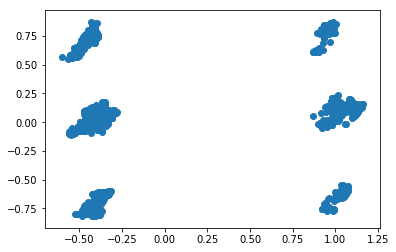

In [40]:
for pca_cl in pca_cls:
    x_ax, y_ax = zip(*pca_cl)
    plt.scatter(x_ax, y_ax)
    plt.show()

In [41]:
n_cl[0]

array([1.10280657, 0.08213278])

## Outlier LocalOutlierFactor

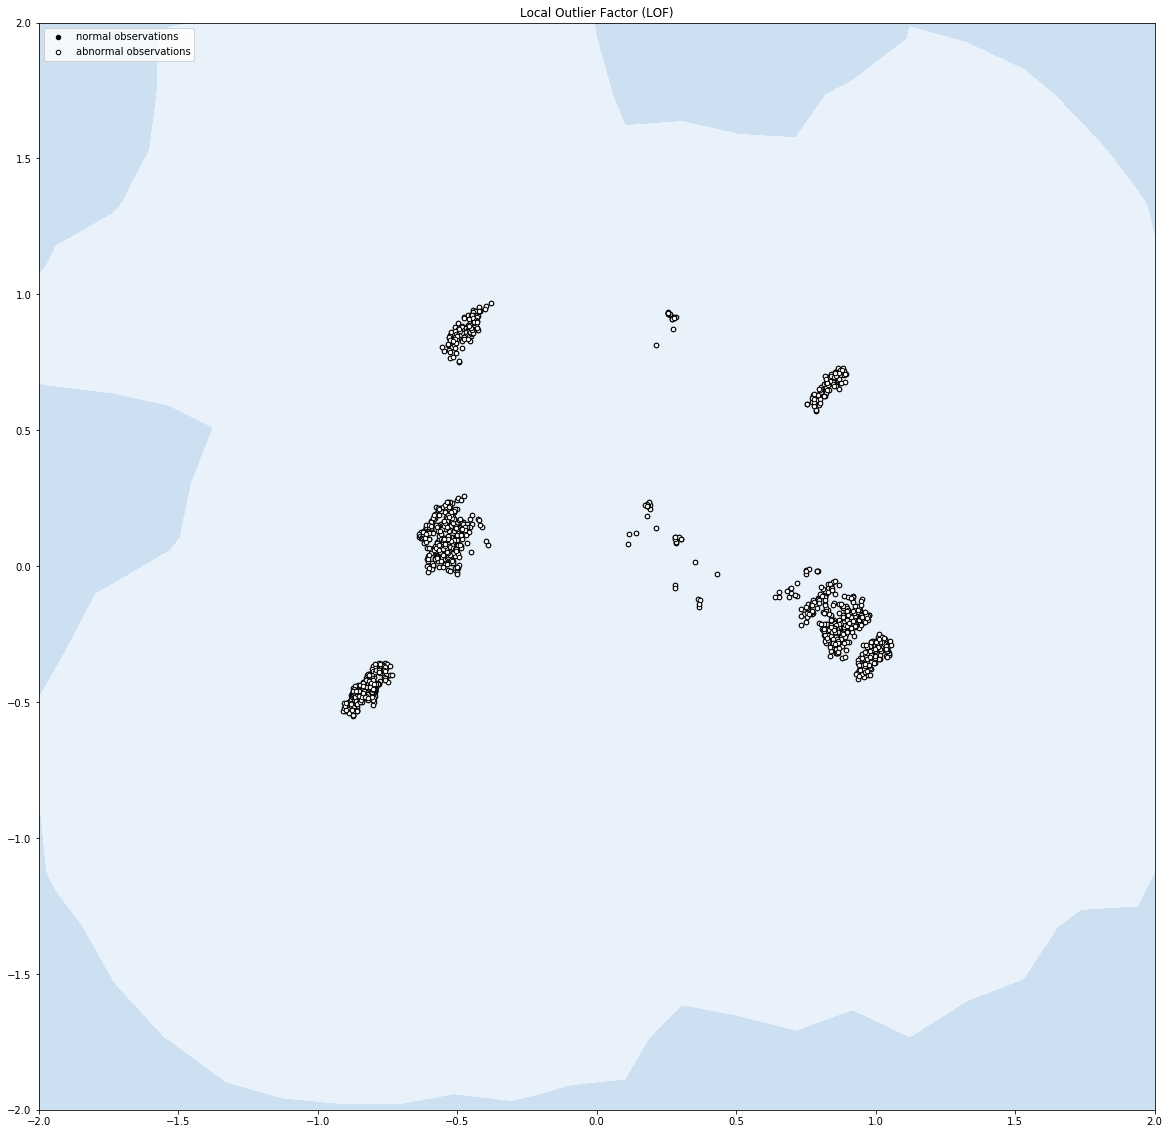

In [42]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# fit the model
clf = LocalOutlierFactor(n_neighbors=5, n_jobs=-1)
y_pred = clf.fit_predict(pca_cls[0])
y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20,20))
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(pca_cls[0][:, 0], pca_cls[0][:, 1], c='black',
                edgecolor='k', s=20)
b = plt.scatter(pca_cls[0][:, 0], pca_cls[0][:, 1], c='white',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.show()

138
0
1237


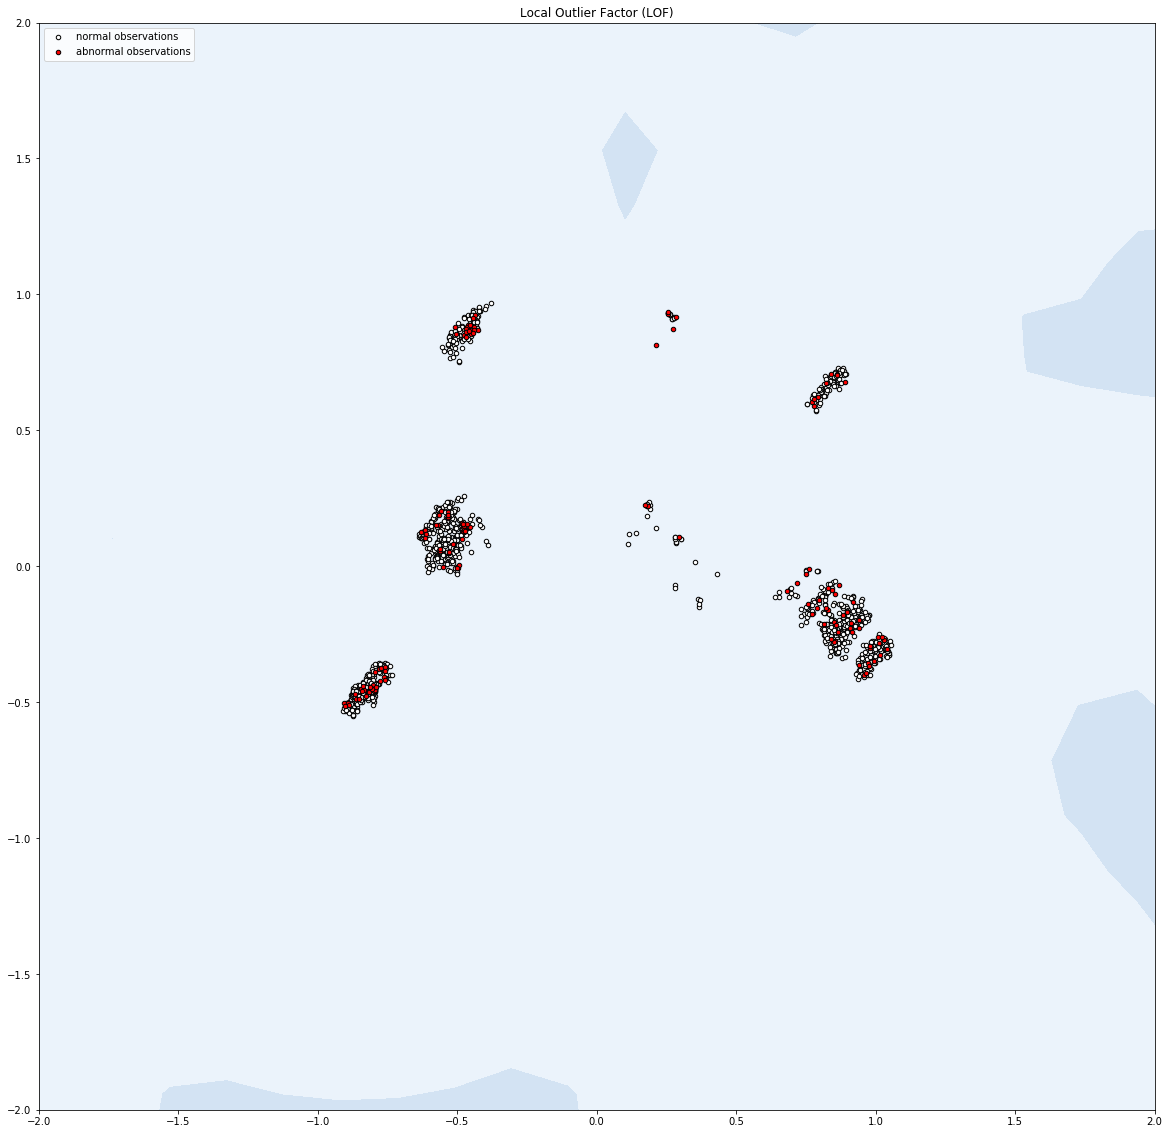

In [96]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=1, n_jobs=-1)

new_data = np.concatenate((pca_cls[0], pca_cls[1]), axis=0)
clf.fit(new_data)
y_pred = clf.fit_predict(pca_cls[0])
y_pred_outliers = y_pred

print(len(list(filter(lambda x: x == -1, y_pred))))
print(len(list(filter(lambda x: x == 0, y_pred))))
print(len(list(filter(lambda x: x == 1, y_pred))))

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


n_outlier = []
n_non_outlier = []
for yi in range(0, len(y_pred)):
    if y_pred[yi] == -1:
        n_outlier.append(list(new_data[yi]))
    if y_pred[yi] == 1:
        n_non_outlier.append(list(new_data[yi]))
        
n_non_outlier = np.array(n_non_outlier)
n_outlier = np.array(n_outlier)
plt.figure(figsize=(20,20))
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(n_non_outlier[:, 0], n_non_outlier[:, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(n_outlier[:, 0], n_outlier[:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.show()

## EllipticEnvelope

351
0
1024


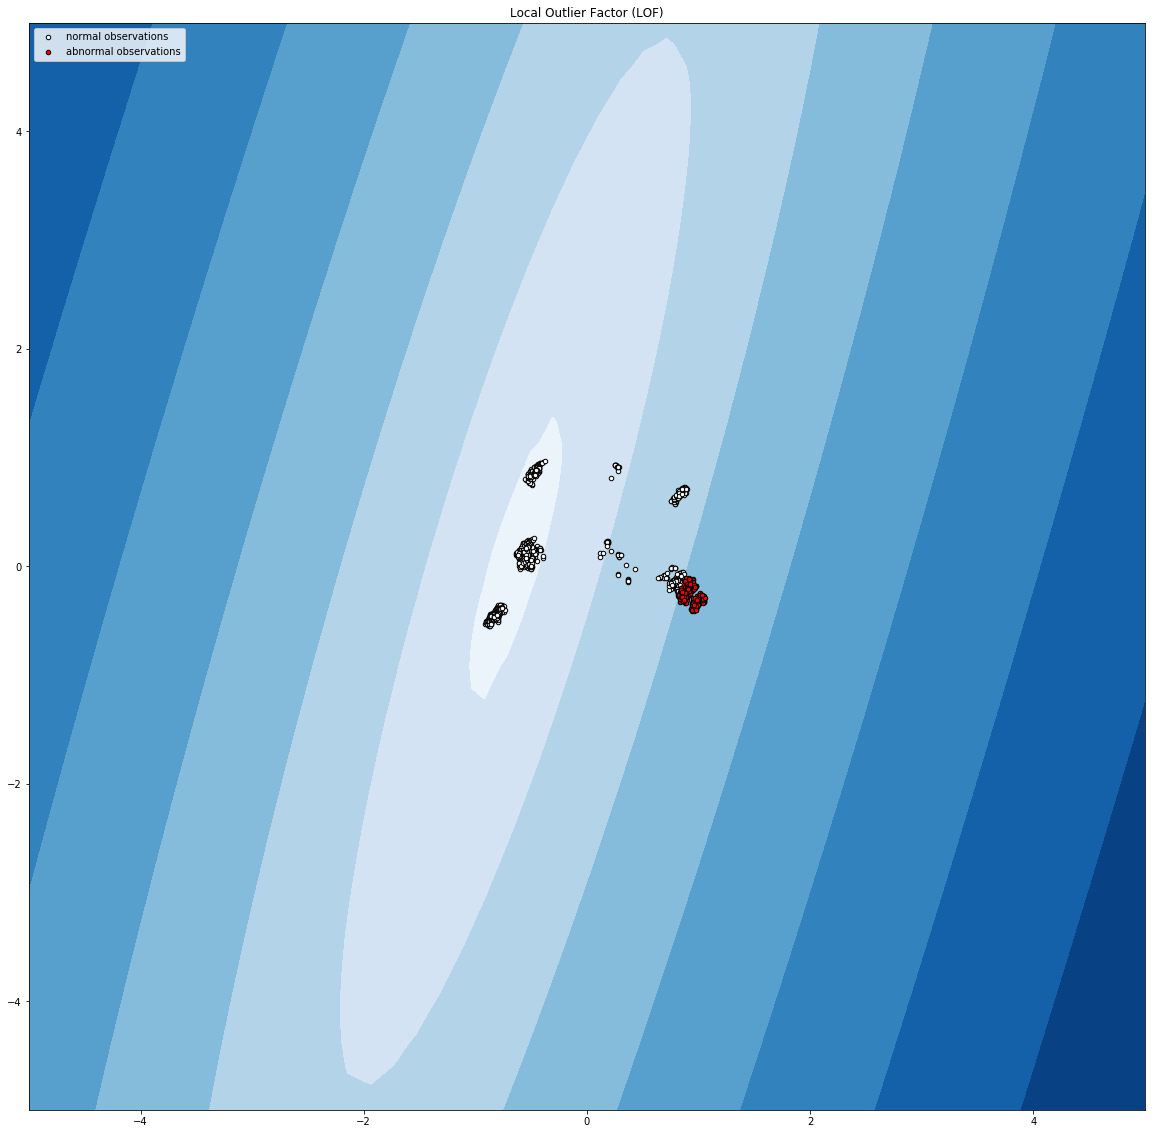

In [89]:
# fit the model
clf = EllipticEnvelope(contamination=0.26)

new_data = np.concatenate((pca_cls[0], pca_cls[1]), axis=0)
clf.fit(new_data)
scores_pred = clf.decision_function(new_data)
y_pred = clf.predict(pca_cls[0])
y_pred_outliers = y_pred

print(len(list(filter(lambda x: x == -1, y_pred))))
print(len(list(filter(lambda x: x == 0, y_pred))))
print(len(list(filter(lambda x: x == 1, y_pred))))

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


n_outlier = []
n_non_outlier = []
for yi in range(0, len(y_pred)):
    if y_pred[yi] == -1:
        n_outlier.append(list(new_data[yi]))
    if y_pred[yi] == 1:
        n_non_outlier.append(list(new_data[yi]))
        
n_non_outlier = np.array(n_non_outlier)
n_outlier = np.array(n_outlier)
plt.figure(figsize=(20,20))
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(n_non_outlier[:, 0], n_non_outlier[:, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(n_outlier[:, 0], n_outlier[:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.show()

## Template

355
0
1020


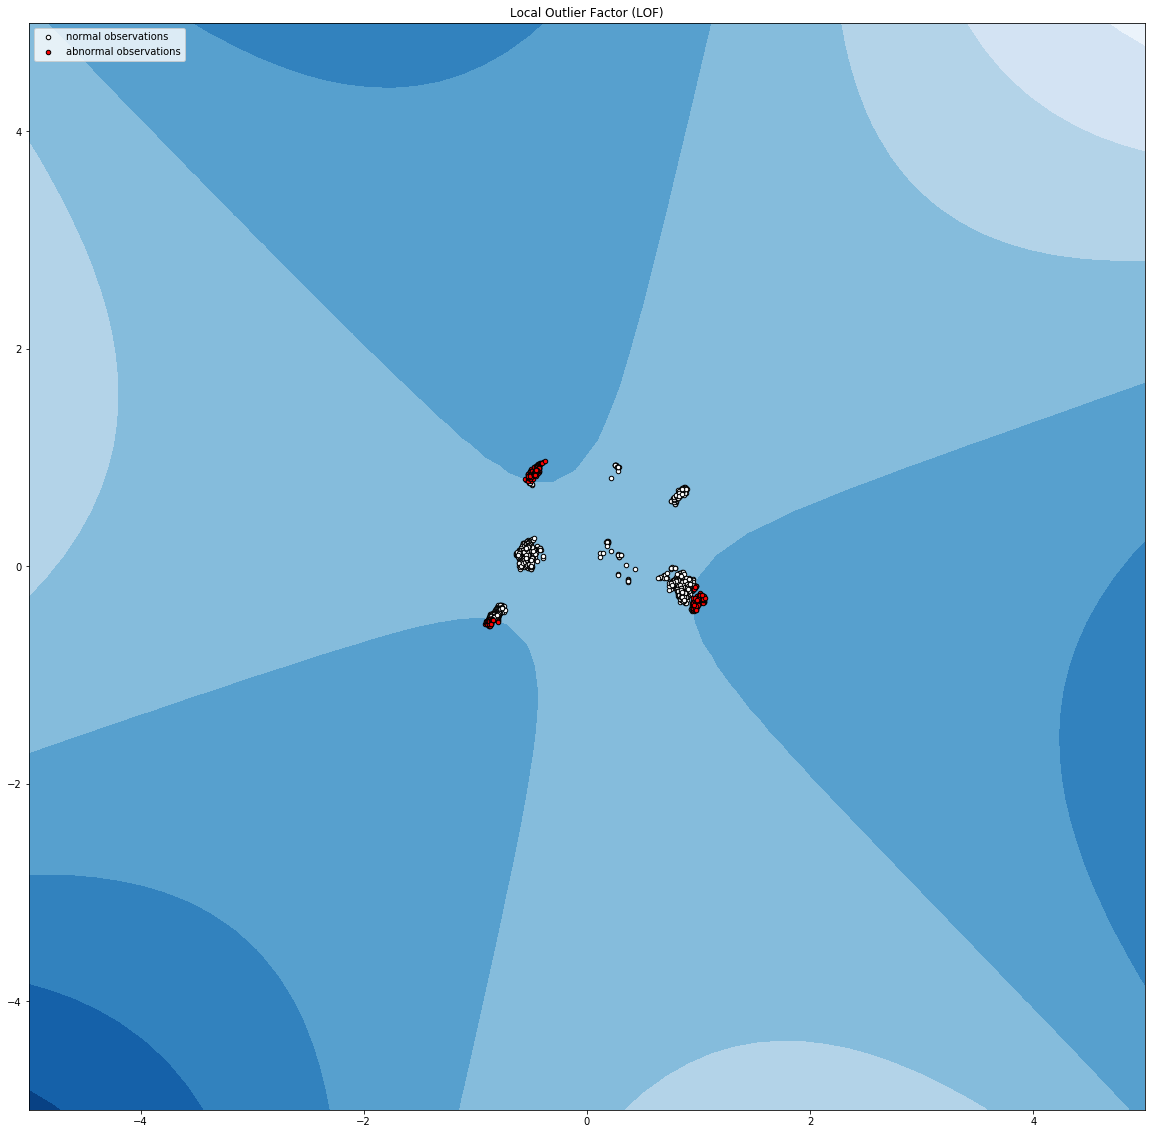

In [102]:
# fit the model
clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="sigmoid", gamma=0.1)

new_data = np.concatenate((pca_cls[0], pca_cls[1]), axis=0)
clf.fit(new_data)
scores_pred = clf.decision_function(new_data)
y_pred = clf.predict(pca_cls[0])
y_pred_outliers = y_pred

print(len(list(filter(lambda x: x == -1, y_pred))))
print(len(list(filter(lambda x: x == 0, y_pred))))
print(len(list(filter(lambda x: x == 1, y_pred))))

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


n_outlier = []
n_non_outlier = []
for yi in range(0, len(y_pred)):
    if y_pred[yi] == -1:
        n_outlier.append(list(new_data[yi]))
    if y_pred[yi] == 1:
        n_non_outlier.append(list(new_data[yi]))
        
n_non_outlier = np.array(n_non_outlier)
n_outlier = np.array(n_outlier)
plt.figure(figsize=(20,20))
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(n_non_outlier[:, 0], n_non_outlier[:, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(n_outlier[:, 0], n_outlier[:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.show()

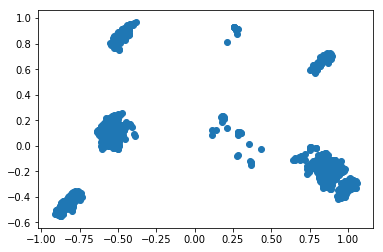

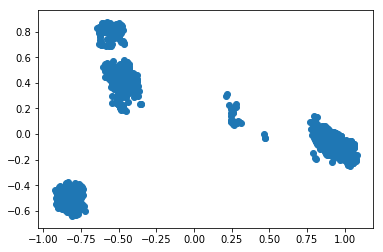

In [79]:
x_ax, y_ax = zip(*pca_cls[0])
plt.scatter(x_ax, y_ax)
plt.show()

x_ax, y_ax = zip(*pca_cls[1])
plt.scatter(x_ax, y_ax)
plt.show()

## IsolationForest

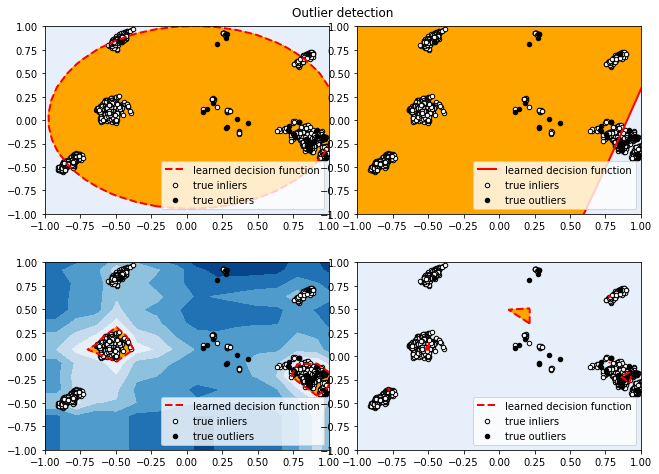

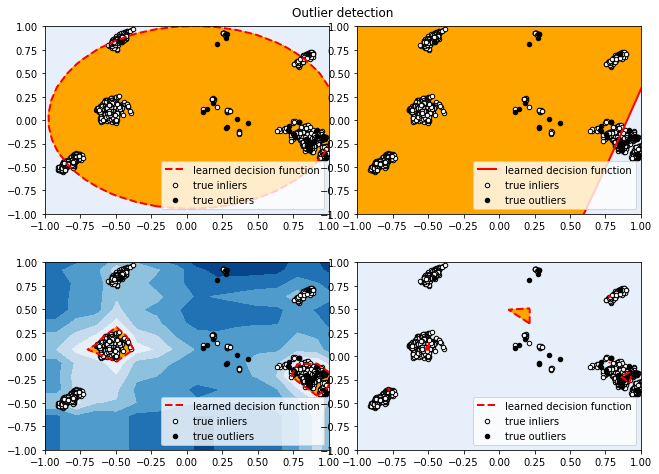

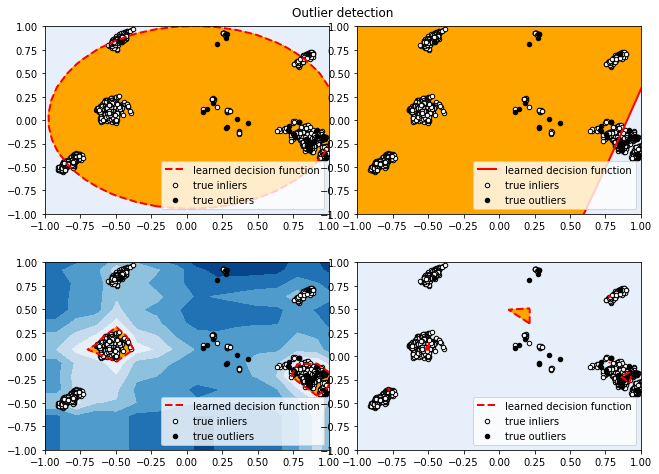

In [32]:
# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=42, n_jobs=-1),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction, n_jobs=-1)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(pca_cls[0])
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(pca_cls[0])
            scores_pred = clf.decision_function(pca_cls[0])
            y_pred = clf.predict(pca_cls[0])
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
#         n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(pca_cls[0][:-n_outliers, 0], pca_cls[0][:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(pca_cls[0][-n_outliers:, 0], pca_cls[0][-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
#         subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-1, 1))
        subplot.set_ylim((-1, 1))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()